In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score

In [5]:
ds = pd.read_csv("weatherHistory.csv")
print (ds)

                      Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556           

In [7]:
This a dataset of all the hourly weather from 04/01/2006 to 09/09/2016. I plan to find out what data is affecting the 
humidity. Im assuming the tempurature is the one that influences the humidity the most, but we will have to find out.

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2286852895.py, line 1)

In [7]:
remove = ['Daily Summary']
ds.drop(remove, inplace=True, axis=1)
print(ds.shape)

(96453, 11)


In [9]:
remove = ['Formatted Date']
ds.drop(remove, inplace=True, axis=1)
print(ds.shape)

(96453, 10)


In [11]:
remove = ['Loud Cover']
ds.drop(remove, inplace=True, axis=1)
print(ds.shape)

(96453, 9)


In [15]:
I have chosen to remove the daily summary sue to it not really being an influence on any of the variables. I have also 
removed the Formatted Date because I believe it wont be necessary for what I am trying to find. Loud cover is always zero, 
so I removed it at well

SyntaxError: invalid syntax (1728121895.py, line 1)

In [13]:
print(ds.isnull().sum())

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64


In [15]:
ds2 = ds.dropna(subset=['Precip Type'])
print (ds2.isnull().sum())
print (ds2.shape)

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64
(95936, 9)


In [17]:
print(ds2['Summary'].dtype) 

object


In [19]:
ds2['Summary'] = ds2['Summary'].astype("string")

C:\Users\joshu\AppData\Local\Temp\ipykernel_123372\591060814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2['Summary'] = ds2['Summary'].astype("string")


In [21]:
print(ds2['Summary'].dtype) 

string


In [23]:
print(ds2['Precip Type'].dtype) 

object


In [25]:
ds2['Precip Type'] = ds2['Precip Type'].astype("string")

C:\Users\joshu\AppData\Local\Temp\ipykernel_123372\3795761746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2['Precip Type'] = ds2['Precip Type'].astype("string")


In [27]:
print(ds2['Precip Type'].dtype) 

string


In [29]:
print(ds2['Temperature (C)'].dtype) 

float64


In [31]:
print(ds2['Apparent Temperature (C)'].dtype) 

float64


In [33]:
print(ds2['Humidity'].dtype) 

float64


In [35]:
print(ds2['Wind Speed (km/h)'].dtype) 

float64


In [37]:
print(ds2['Wind Bearing (degrees)'].dtype) 

float64


In [39]:
print(ds2['Visibility (km)'].dtype) 

float64


In [41]:
print(ds2['Pressure (millibars)'].dtype)

float64


In [43]:
ds2 = ds2.rename(columns={'Humidity': 'Target'})

In [45]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  string 
 1   Precip Type               95936 non-null  string 
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Target                    95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  float64
 7   Visibility (km)           95936 non-null  float64
 8   Pressure (millibars)      95936 non-null  float64
dtypes: float64(7), string(2)
memory usage: 7.3 MB


In [47]:
print(ds2)

             Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0      Partly Cloudy        rain         9.472222                  7.388889   
1      Partly Cloudy        rain         9.355556                  7.227778   
2      Mostly Cloudy        rain         9.377778                  9.377778   
3      Partly Cloudy        rain         8.288889                  5.944444   
4      Mostly Cloudy        rain         8.755556                  6.977778   
...              ...         ...              ...                       ...   
96448  Partly Cloudy        rain        26.016667                 26.016667   
96449  Partly Cloudy        rain        24.583333                 24.583333   
96450  Partly Cloudy        rain        22.038889                 22.038889   
96451  Partly Cloudy        rain        21.522222                 21.522222   
96452  Partly Cloudy        rain        20.438889                 20.438889   

       Target  Wind Speed (km/h)  Wind Bearing (deg

In [49]:
import seaborn as sns

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score

In [53]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

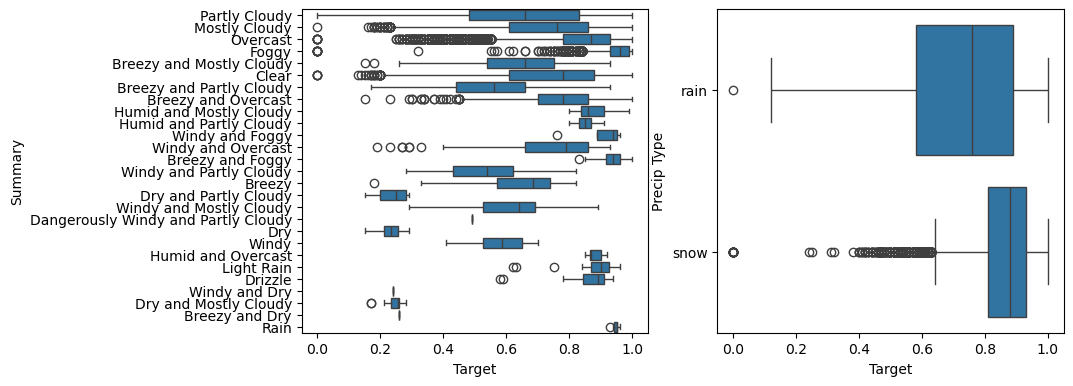

In [55]:
cat_list=['Summary','Precip Type']
fig=plt.figure(figsize=(160,100))
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(20,30,i+1)
    chart=sns.boxplot(x='Target', y=column, data=ds2)
plt.show()


In [59]:
Due to the large number of categories in Summary, I will not be using it.

SyntaxError: invalid syntax (3019599877.py, line 1)

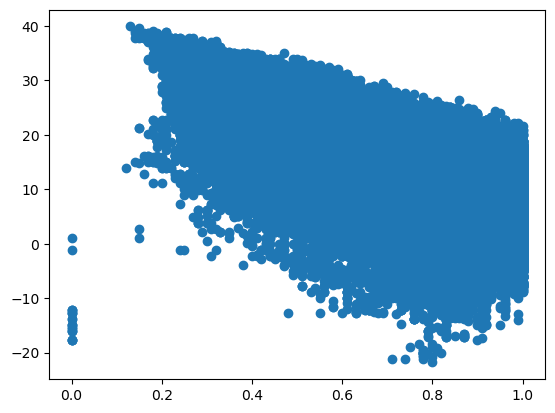

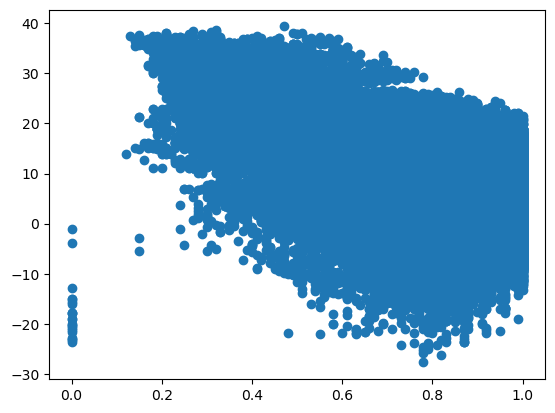

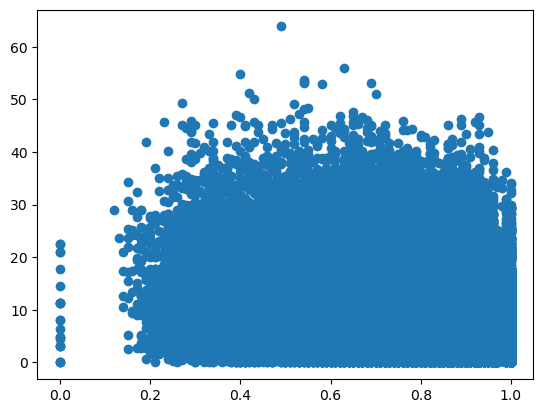

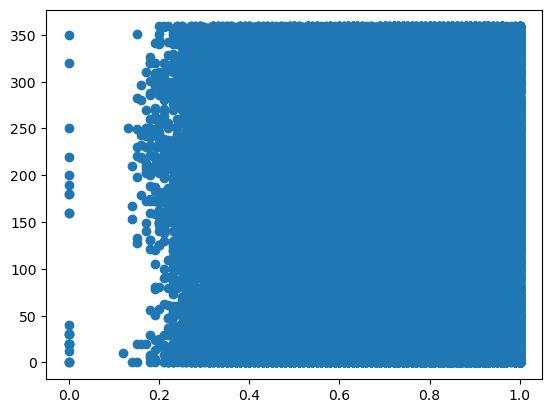

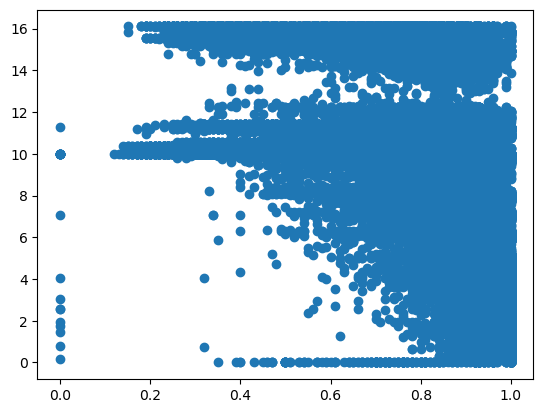

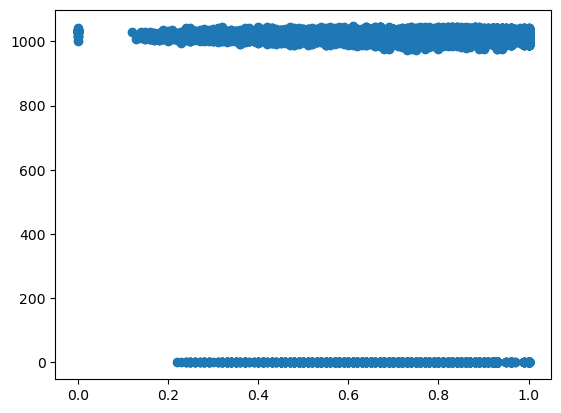

In [61]:
num_list=['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']


for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(50,50,i+1)
    plt.scatter(x='Target', y=column, data=ds2)
    plt.show()

    


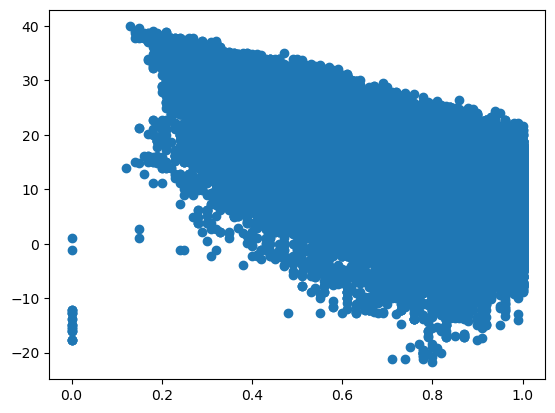

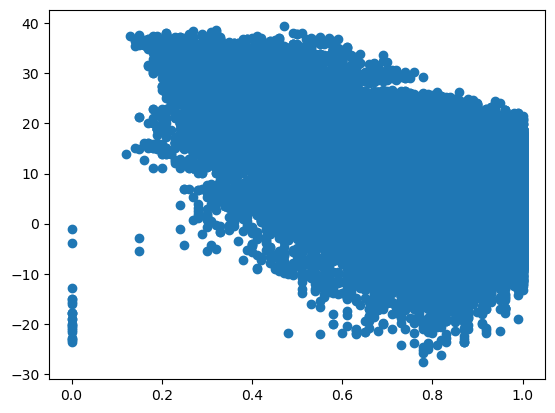

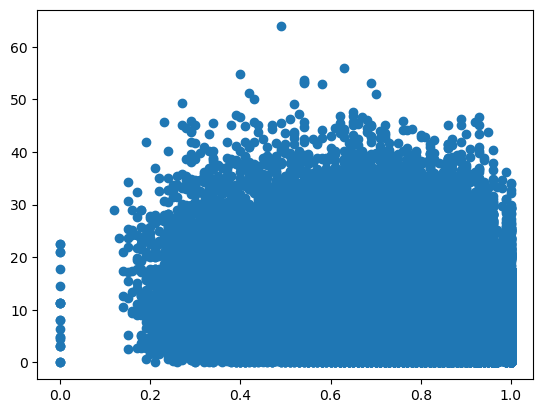

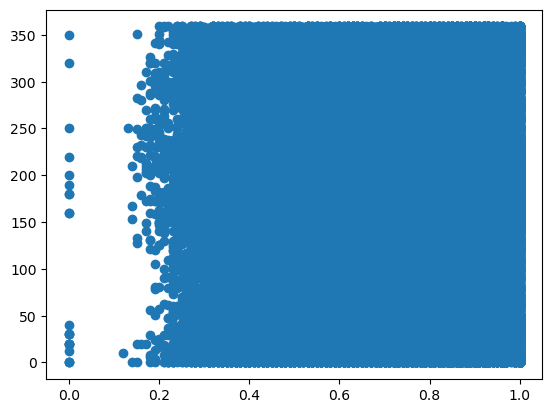

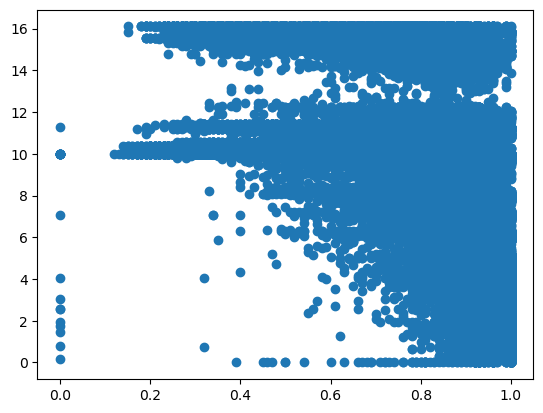

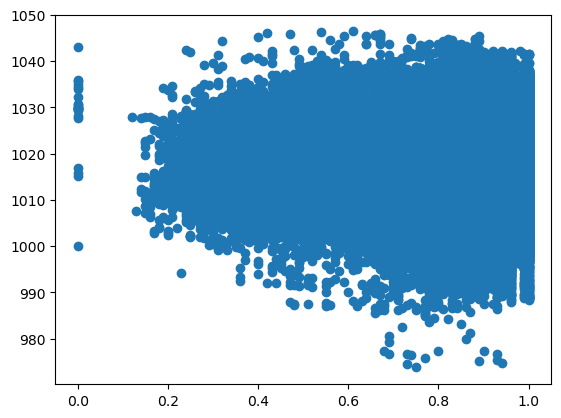

In [62]:
ds3 = ds2[ds2['Pressure (millibars)'] > 1]
num_list=['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']


for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(50,50,i+1)
    plt.scatter(x='Target', y=column, data=ds3)
    plt.show()

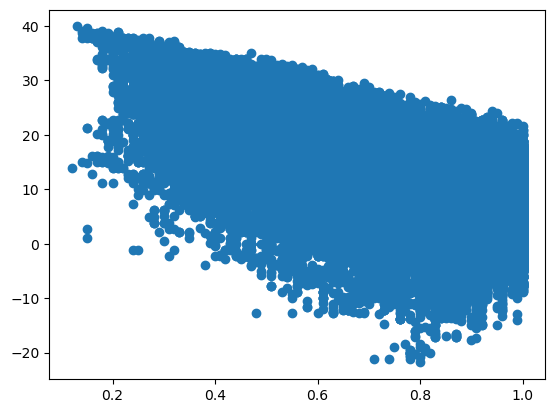

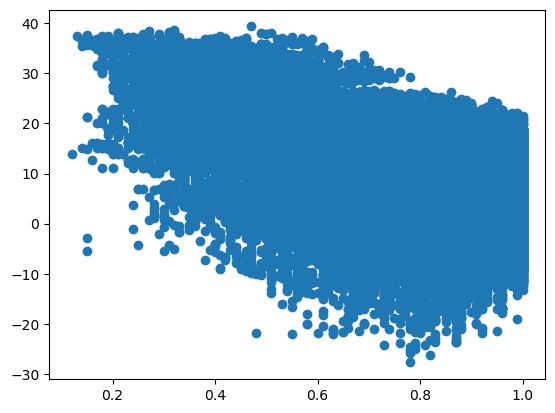

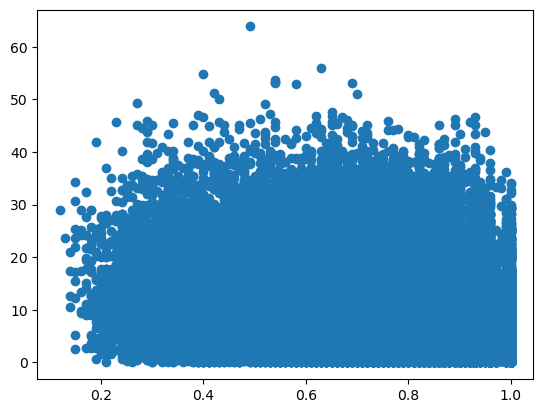

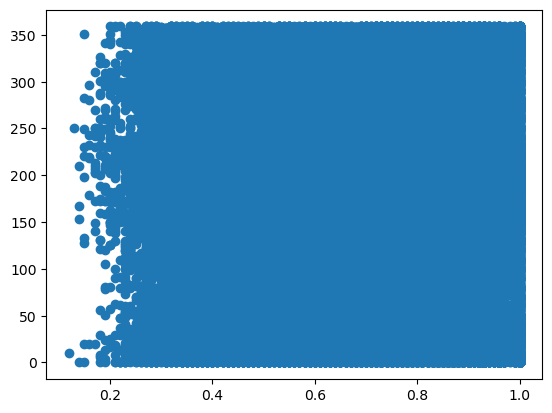

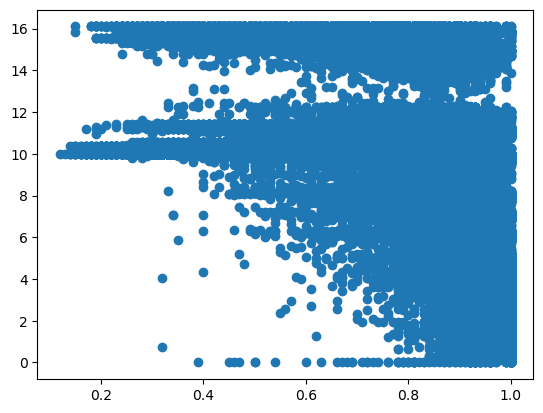

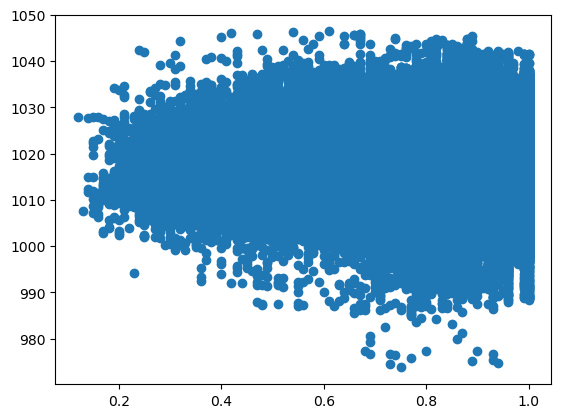

In [64]:
ds4 =ds3[ds3['Target']  > 0.01]
num_list=['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']


for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(50,50,i+1)
    plt.scatter(x='Target', y=column, data=ds4)
    plt.show()

In [66]:
remove = ['Wind Bearing (degrees)']
ds4.drop(remove, inplace=True, axis=1)
print(ds4.shape)

(94626, 8)


C:\Users\joshu\AppData\Local\Temp\ipykernel_123372\3386700093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds4.drop(remove, inplace=True, axis=1)


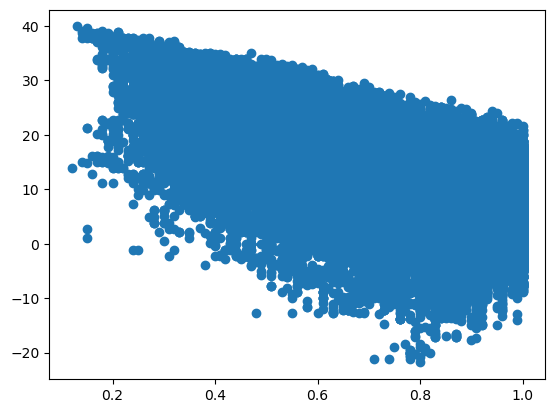

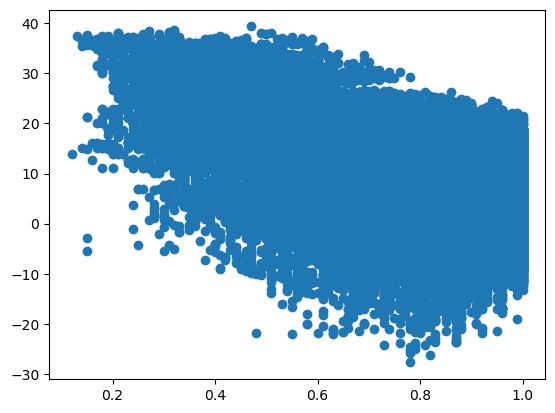

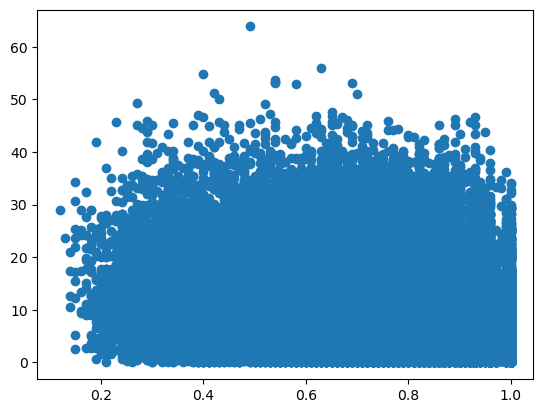

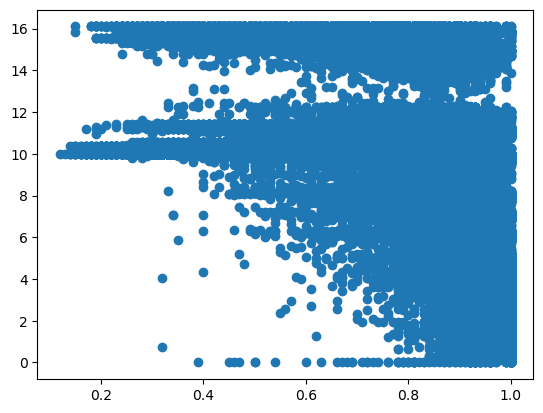

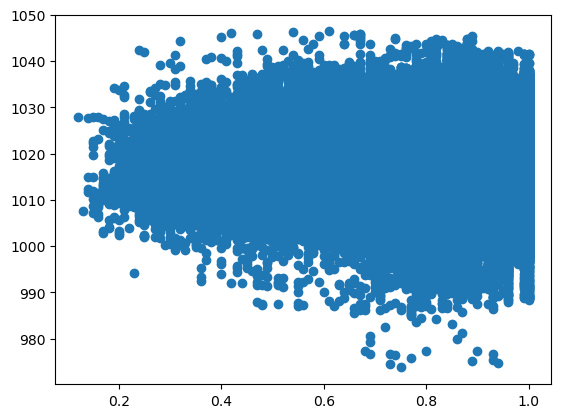

In [69]:
num_list=['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']


for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(50,50,i+1)
    plt.scatter(x='Target', y=column, data=ds4)
    plt.show()

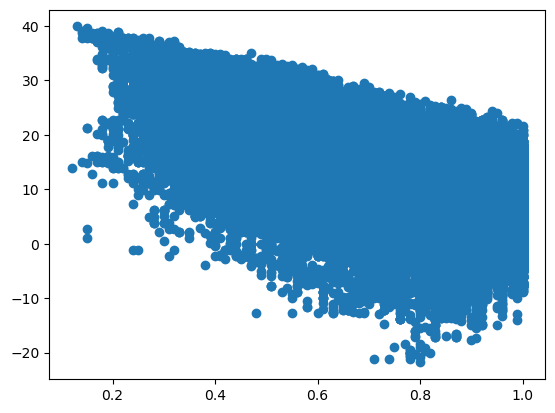

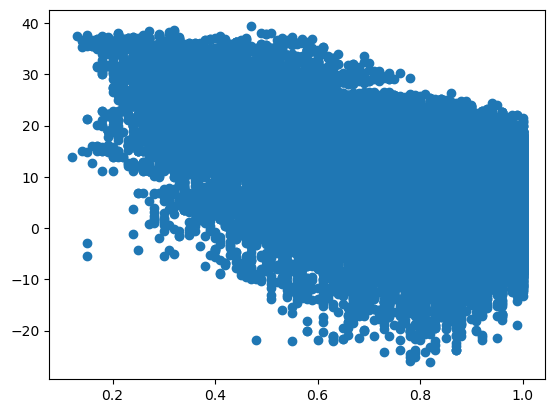

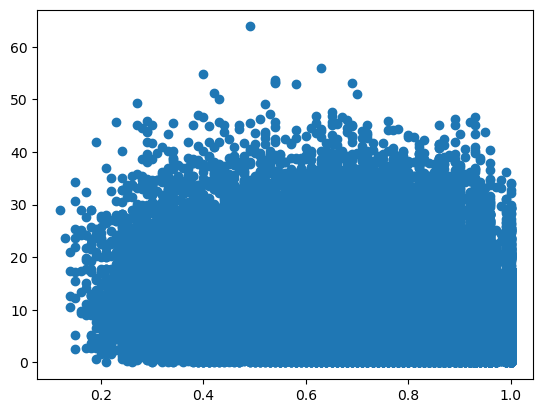

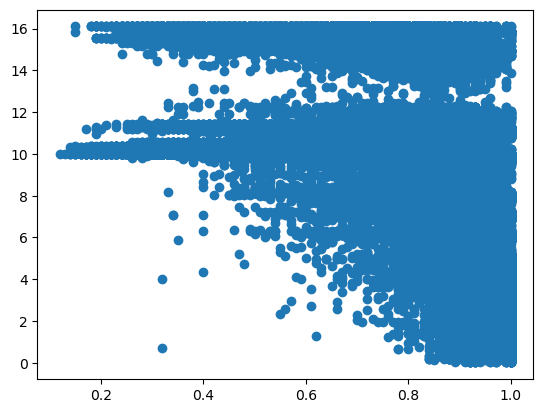

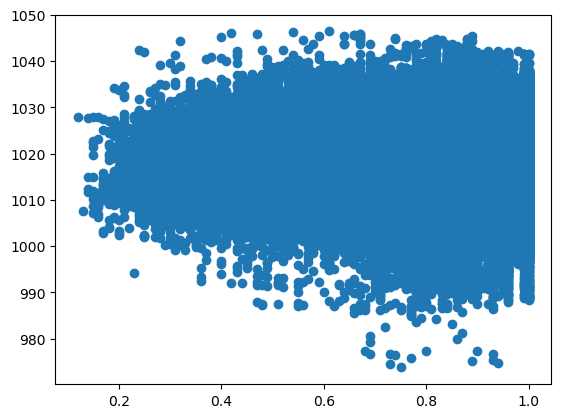

In [71]:
ds5 =ds4[ds4['Visibility (km)']  > 0.01]
num_list=['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']


for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(50,50,i+1)
    plt.scatter(x='Target', y=column, data=ds5)
    plt.show()

In [ ]:
I ended up dropping Wind Bearing category due to it being a vey random chart with a range from anywhere between 360 and 0

In [76]:
ds5['Precip Type'].replace(['snow', 'rain'],['1','0'],inplace=True)
print(ds5)

             Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0      Partly Cloudy           0         9.472222                  7.388889   
1      Partly Cloudy           0         9.355556                  7.227778   
2      Mostly Cloudy           0         9.377778                  9.377778   
3      Partly Cloudy           0         8.288889                  5.944444   
4      Mostly Cloudy           0         8.755556                  6.977778   
...              ...         ...              ...                       ...   
96448  Partly Cloudy           0        26.016667                 26.016667   
96449  Partly Cloudy           0        24.583333                 24.583333   
96450  Partly Cloudy           0        22.038889                 22.038889   
96451  Partly Cloudy           0        21.522222                 21.522222   
96452  Partly Cloudy           0        20.438889                 20.438889   

       Target  Wind Speed (km/h)  Visibility (km)  

C:\Users\joshu\AppData\Local\Temp\ipykernel_123372\2647725261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds5['Precip Type'].replace(['snow', 'rain'],['1','0'],inplace=True)
C:\Users\joshu\AppData\Local\Temp\ipykernel_123372\2647725261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds5['Precip Type'].replace(['snow', 'rain'],['1',

In [78]:
ds5.iloc[:,[1,2,3,4,5,6,7]].corr()

,Precip Type,Temperature (C),Apparent Temperature (C),Target,Wind Speed (km/h),Visibility (km),Pressure (millibars)
Precip Type,1.000000,-0.562302,-0.564609,0.236902,-0.069272,-0.318039,0.300295
Temperature (C),-0.562302,1.000000,0.992672,-0.636313,0.008445,0.392405,-0.309007
Apparent Temperature (C),-0.564609,0.992672,1.000000,-0.606873,-0.056850,0.381255,-0.286910
Target,0.236902,-0.636313,-0.606873,1.000000,-0.223661,-0.372330,0.038566
Wind Speed (km/h),-0.069272,0.008445,-0.056850,-0.223661,1.000000,0.101274,-0.254580
Visibility (km),-0.318039,0.392405,0.381255,-0.372330,0.101274,1.000000,-0.160604
Pressure (millibars),0.300295,-0.309007,-0.286910,0.038566,-0.254580,-0.160604,1.000000


In [80]:
from sklearn.feature_selection import SelectKBest, f_classif
x = ds5.loc[:, ['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']]
y = ds5['Target']
fs = SelectKBest(score_func=f_classif, k='all')
FeaturesS = fs.fit(x, y)
np.set_printoptions(suppress = True)
print(FeaturesS.scores_)
print(FeaturesS.pvalues_)


[848.16573224 737.4512292   82.10516542 542.48449052  16.22963992]
[0. 0. 0. 0. 0.]


In [82]:
from sklearn.linear_model import LinearRegression

In [84]:
corr = ds5.iloc[:,[1, 2,3,4,5,6,7]].corr()
print(corr)

                          Precip Type  Temperature (C)  \
Precip Type                  1.000000        -0.562302   
Temperature (C)             -0.562302         1.000000   
Apparent Temperature (C)    -0.564609         0.992672   
Target                       0.236902        -0.636313   
Wind Speed (km/h)           -0.069272         0.008445   
Visibility (km)             -0.318039         0.392405   
Pressure (millibars)         0.300295        -0.309007   

                          Apparent Temperature (C)    Target  \
Precip Type                              -0.564609  0.236902   
Temperature (C)                           0.992672 -0.636313   
Apparent Temperature (C)                  1.000000 -0.606873   
Target                                   -0.606873  1.000000   
Wind Speed (km/h)                        -0.056850 -0.223661   
Visibility (km)                           0.381255 -0.372330   
Pressure (millibars)                     -0.286910  0.038566   

                      

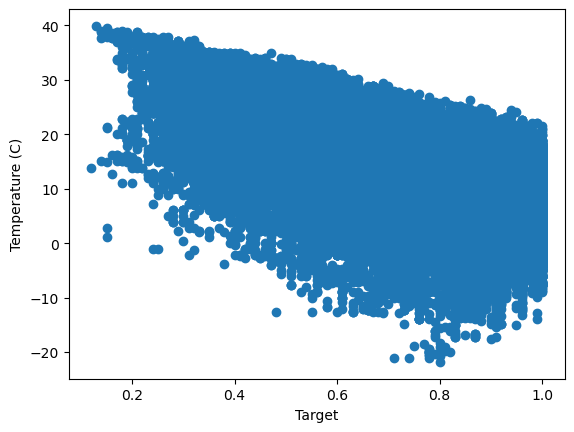

In [86]:
plt.scatter(ds5['Target'], ds5['Temperature (C)'], marker='o')
plt.xlabel('Target')
plt.ylabel('Temperature (C)')
plt.show()


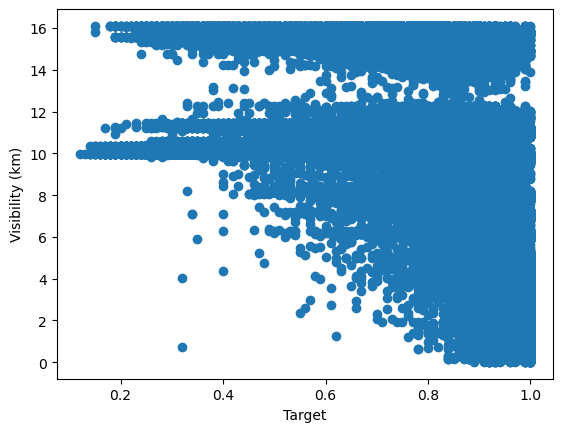

In [88]:
plt.scatter(ds5['Target'], ds5['Visibility (km)'], marker='o')
plt.xlabel('Target')
plt.ylabel('Visibility (km)')
plt.show()

In [90]:
x = ds5.loc[:,['Temperature (C)']]
y = ds5['Target']
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=5)


In [92]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, Y_train)


LinearRegression()

In [94]:
humidity_pred = model.predict(x_test)
print('R-squared: %.4f' % model.score(x_test, Y_test))  


R-squared: 0.4010


In [96]:
print(model.intercept_)
print(model.coef_)


0.8908139178518455
[-0.01304908]


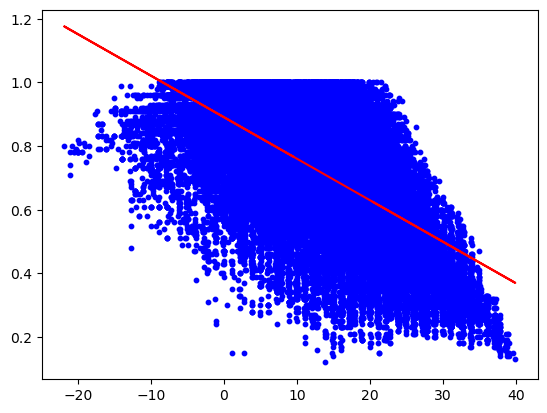

In [98]:
y_pred = model.predict(x)
plt.scatter(x, y, s=10, color='b')
plt.plot(x, y_pred, color='r')
plt.show()

In [100]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree = 2)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)


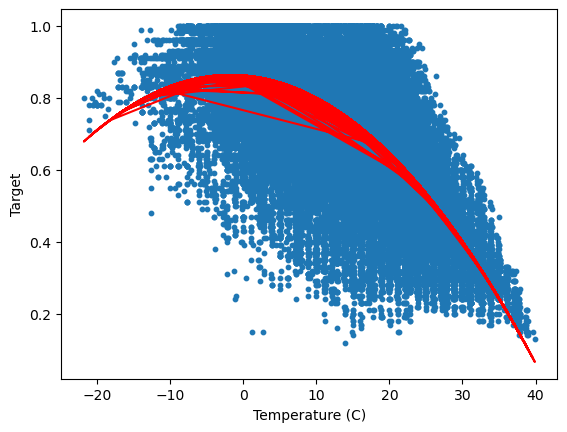

In [102]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred,  color='r')
plt.xlabel('Temperature (C)')
plt.ylabel('Target')
plt.show()


In [104]:
print(model.intercept_)
print(model.coef_)


0.8620103663840717
[ 0.         -0.00162943 -0.00045872]


In [106]:
print('R-Squared for training set: %.4f' % model.score(x_poly,y))


R-Squared for training set: 0.4697


In [108]:
x = ds5.loc[:,['Visibility (km)']]
y = ds5['Target']
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=5)

In [110]:
model = LinearRegression()
model.fit(x_train, Y_train)


LinearRegression()

In [112]:
humidity_pred = model.predict(x_test)
print('R-squared: %.4f' % model.score(x_test, Y_test))  


R-squared: 0.1373


In [114]:
print(model.intercept_)
print(model.coef_)


0.9176665385277621
[-0.01760928]


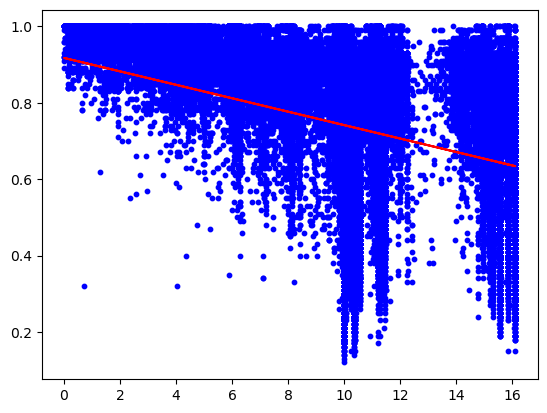

In [116]:
y_pred = model.predict(x)
plt.scatter(x, y, s=10, color='b')
plt.plot(x, y_pred, color='r')
plt.show()

In [118]:
polynomial_features = PolynomialFeatures(degree = 2)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)


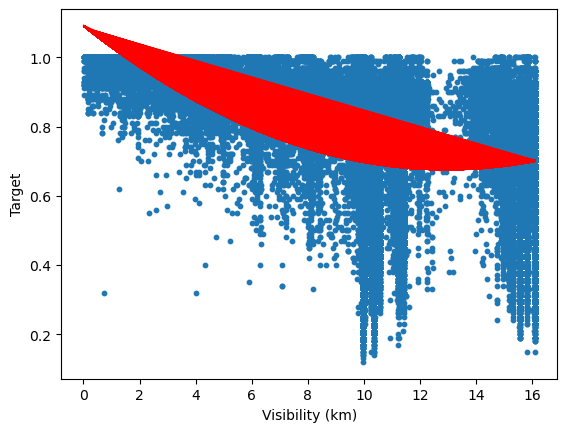

In [120]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred,  color='r')
plt.xlabel('Visibility (km)')
plt.ylabel('Target')
plt.show()

In [122]:
print(model.intercept_)
print(model.coef_)


1.091706505152096
[ 0.         -0.06413922  0.00247539]


In [124]:
print('R-Squared for training set: %.4f' % model.score(x_poly,y))


R-Squared for training set: 0.2092


In [ ]:
Tempature seems to have the greatest affect on the humidity, but its R Sqaured was still quite low.
